# Predicting Life Expectancy (WHO)
by: Kristofer Rivera - 04/27/2022

## Overview

The data set was acquired from Kaggle user KUMARRAJARSHI: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

"Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population."

## Goal

The goal of this project is to use economic and public health data acquired from the (WHO) World Health Organization spanning 2000 - 2015 to predict life expectancy. 
 
## Process

Upon successful acquistion of the *WHO* dataset from Kaggle. It was then transformed into a series of DataFrames which could be used in exploration and model creation. The intial raw dataframe consisted of, 2938 rows and 22 columns. For data cleaning, columns were renames, null values imputed for using the mean and a dummy variable was created for development status. My cleaned data set had the same amount of rows and columns. Through statistical testing and exploratory analysis, I was able to determine top drivers of life expectancy including: 'income_composition_of_resources', 'schooling', 'hiv_aids', 'gdp', 'developing', and 'bmi.' Using these drivers as features, I built several types of regression models to predict life expectancy and evaluated my best model, a polynomial regression model, on out-of-sample data. This model was able to predict life_expectancy with 84% accuracy and a RMSE score on 3.81. 

In [1]:
# Necessary Imports
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Imports for arithmetic calculations and data frame manipulationimport pandas as pd 
import numpy as np
import pandas as pd

#Imports for statistical analysis
from scipy import stats
import statistics

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#Imports for modeling and evaluation
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

#Imports for user defined functions
import wrangle as wr
import explore as ex
import evaluate as ev

# plotting defaults
plt.rc('figure', figsize=(13, 6))
plt.style.use('seaborn-whitegrid')
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=14)

## Wrangle

The data was acquired by downloading a .csv file from Kaggle. After data acquisition, the table was analyzed, cleaned, columns renamed columns and datatypes standardized. All the preparation can found in wrangle.py 

(https://github.com/kristofer-rivera/predicting-life-expectancy/blob/main/wrangle.py).

#### Acquire Raw Data

In [2]:
df = wr.acquire()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


*What my raw data looked like before cleaning.*

In [3]:
# Checked null values
wr.attribute_nulls(df)

,rows_missing,percent_missing
Country,0,0.000000
Year,0,0.000000
Status,0,0.000000
Life expectancy,10,0.003404
Adult Mortality,10,0.003404
infant deaths,0,0.000000
Alcohol,194,0.066031
percentage expenditure,0,0.000000
Hepatitis B,553,0.188223
Measles,0,0.000000


**Dealt with null values by imputing with the mean for all continuous variables.**

#### Acquire Cleaned and Split Data

**Cleaning Steps:**
- Converted all strings to lowercase and replace white spaces with underscores
- Changed year to object type as it categorical
- Renamed columns for further clarity and format uniformity
- Iputed for null values using the mean for continuous variables
- Created a dummy variable for the development satus column√

In [4]:
train, validate, test = wr.wrangle_who()
train.shape, validate.shape, test.shape

((1645, 22), (705, 22), (588, 22))

In [5]:
train.head()

,country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_composition_of_resources,schooling,developing
1782,Myanmar,2013,66.2,22.0,42,0.700000,38.337935,75.000000,1010,22.1,...,2.16000,75.0,0.4,1168.839470,51448196.0,12.9,13.2,0.540,9.1,1
946,Gabon,2015,66.0,229.0,2,4.602861,0.000000,8.000000,27,36.3,...,5.93819,8.0,2.7,7388.984144,193175.0,6.1,5.9,0.694,12.6,1
1682,Mauritius,2000,71.0,177.0,0,4.600000,336.321333,88.000000,0,25.3,...,3.78000,88.0,0.1,3861.324140,1186873.0,8.1,8.1,0.667,12.1,1
2629,Togo,2003,54.7,355.0,15,1.020000,2.995960,80.940461,295,17.9,...,5.00000,72.0,5.2,31.437144,539141.0,8.8,8.7,0.428,9.9,1
422,Burundi,2009,56.2,338.0,23,4.050000,2.030495,94.000000,305,15.7,...,6.96000,94.0,2.4,24.944652,848931.0,7.8,7.8,0.336,8.6,1


*What my data looked like after cleaning and preparation.*

### Focused Questions
1. Is there a linear relationship between income composition of resources and life expectancy?

2. Is there a linear relationship between schooling and life expectancy? Is this a real correlation or is it because schooling is correlated with income composition? Which is the more important causal variable for life expectancy?

3. Is there a significant relationship between status as a developing country and infant mortality?

4. Is there a signifiant relationship between gdp and life expectancy?

5. Is there a linear relationship between hiv_aids prevelance and life expectancy?

### Exploration

**I started by visualizing life expectancy for each country.**

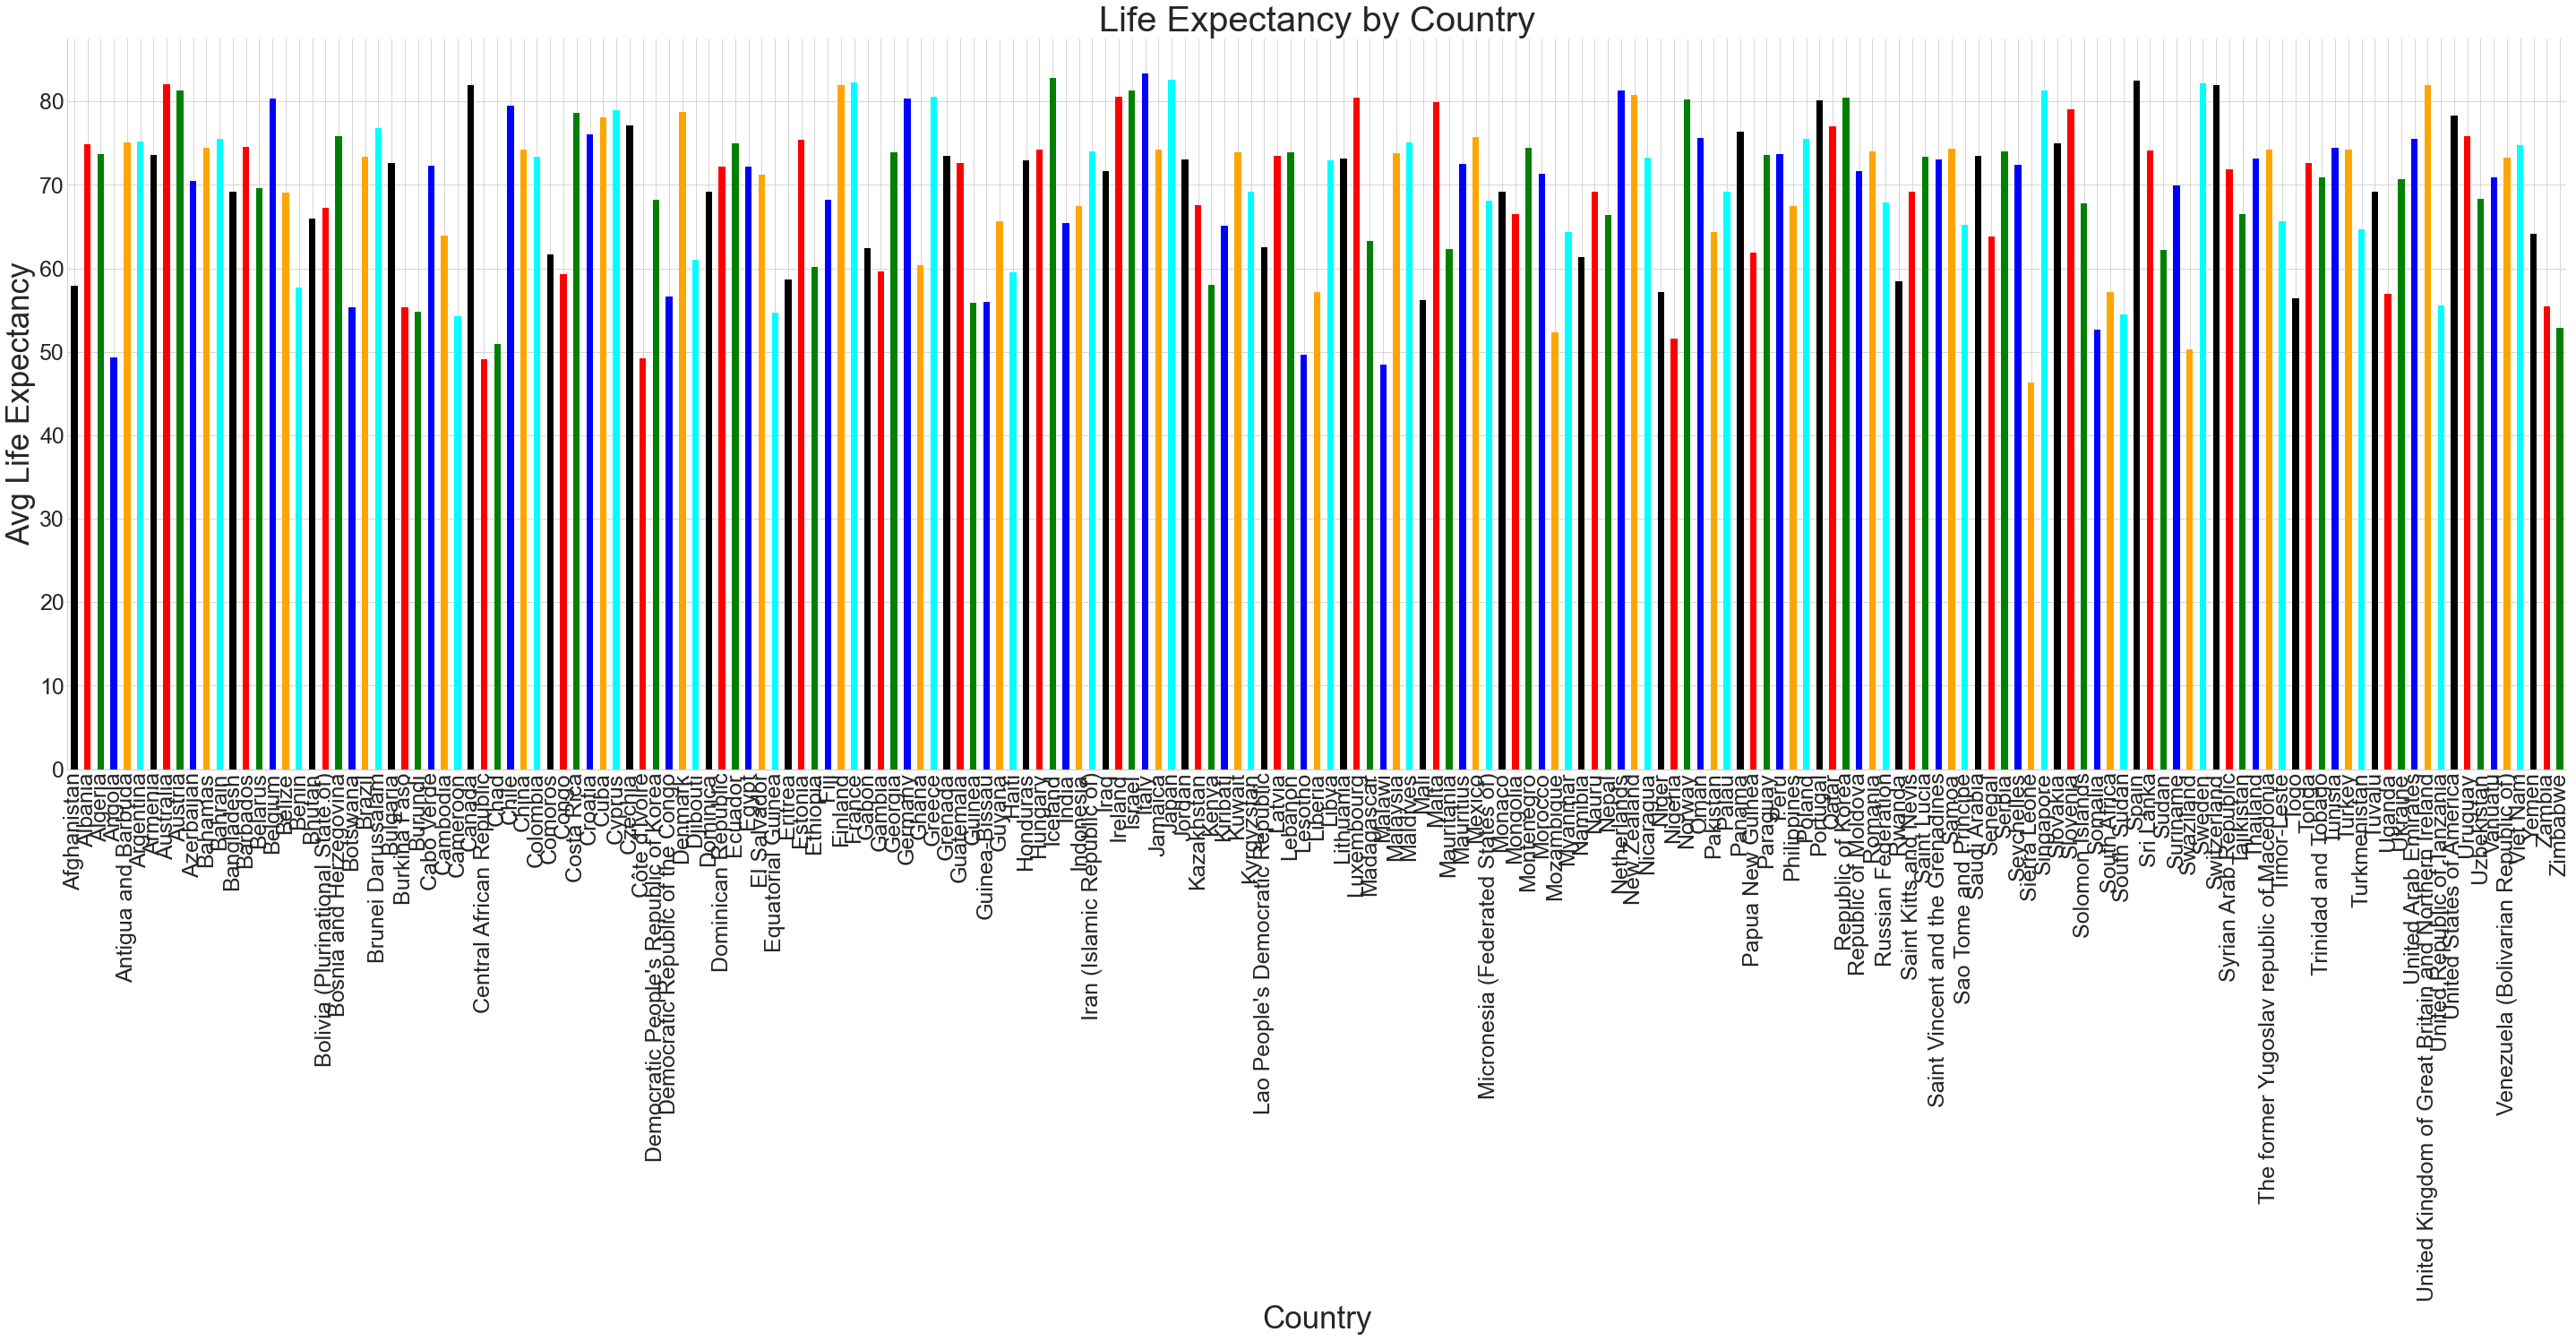

In [6]:
ex.countries(train)

*Clear divisions between different countries life expectancies.*

**Next, I wanted to see how life expectancy varied by the years in my dataset.**

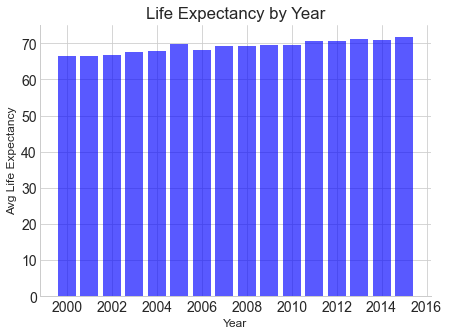

In [7]:
ex.years(train)

*We see a steady increase in life expectancy through the years which is what we should expect as the world progressivly becomes more developed.*

**Before moving on to asking focused questions, I wanted to plot the correlations of all my variables with my target.**

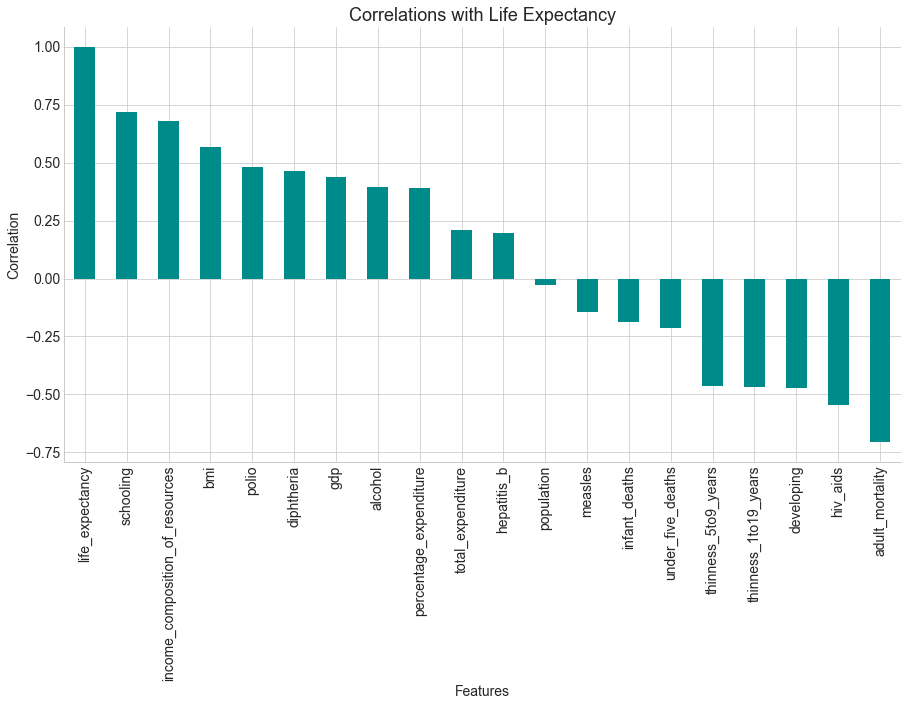

In [8]:
# Checking assessed_value correlation vs all variables

ex.plot_correlations(train)

*I immediately detect some strong correlations with my target variable, life expectancy. Schooling and income composition have the strongest positive correlation while adult_mortality and hiv_aids have very strong negative correlations. These are strong candidates for statistical testing and further exploration.* 

** Next, I creat

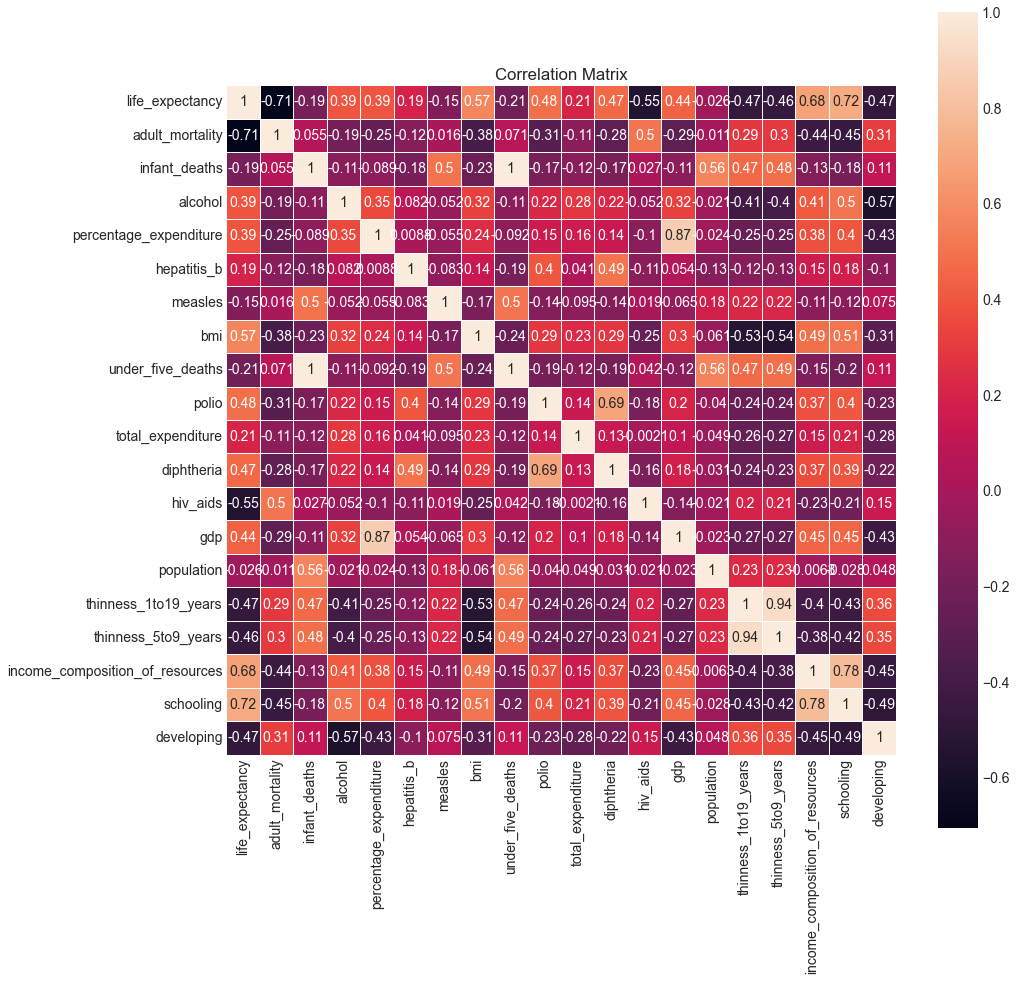

In [9]:
ex.heatmap(train)